### Step 1: Load the Processed Dataset
- To begin the exploratory data analysis (EDA), first load the processed dataset that was saved during the ETL pipeline.

#### Load Data
- Read the standardized dataset (diabetes_scaled.csv) from the ../data/processed/ directory using pandas.
- This dataset includes standardized feature columns and the target variable.
#### Preview Data:
- Displayed the first few rows of the dataset using head() to verify successful loading.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
processed_path = "../data/processed/diabetes_scaled.csv"
scaled_data = pd.read_csv(processed_path)
print(scaled_data.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  target  
0 -0.054499  0.418531 -0.370989   151.0  
1 -0.830301 -1.436589 -1.938479    75.0  
2 -0.054499  0.060156 -0.545154   141.0  
3  0.721302  0.476983 -0.196823   206.0  
4 -0.054499 -0.672502 -0.980568   135.0  


### Step 2: Initial Dataset Overview

#### Descriptive Statistics
- Key metrics such as mean, standard deviation, and range (min and max) were calculated for all features.
- Since the features were standardized, their mean is approximately 0 and standard deviation is approximately 1, as expected.
- The target variable (target) retains its original scale, ranging from 25 to 346.

#### Missing Value Check:
- Verified that there are no missing values in the dataset, ensuring data integrity.

#### Unique Value Counts
- Counted the number of unique values for each feature to identify potential categorical variables or features with limited variability.

#### Observations:
- sex is a binary variable with 2 unique values.
- Features like bmi, bp, and s2 have many unique values, indicating they are likely continuous variables.


In [8]:
print("Descriptive Statistics:")
print(scaled_data.describe())

print("\nMissing Values:")
print(scaled_data.isnull().sum())

print("\nUnique Values in Each Feature:")
for col in scaled_data.columns:
    print(f"{col}: {scaled_data[col].nunique()} unique values")

Descriptive Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -8.037814e-18  2.290777e-16  2.813235e-17 -2.411344e-17  1.607563e-17   
std    1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00   
min   -2.254290e+00 -9.385367e-01 -1.897929e+00 -2.363050e+00 -2.665411e+00   
25%   -7.841722e-01 -9.385367e-01 -7.196249e-01 -7.706500e-01 -7.200196e-01   
50%    1.131724e-01 -9.385367e-01 -1.531324e-01 -1.192138e-01 -9.084100e-02   
75%    8.005001e-01  1.065488e+00  6.569519e-01  7.493678e-01  5.961931e-01   
max    2.327895e+00  1.065488e+00  3.585718e+00  2.776058e+00  3.235851e+00   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   8.037814e-18 -1.205672e-17  2.170210e-16  1.607563e-17 -6.832142e-17   
std    1.001133e+00  1.0011

### Step 3: Feature Distributions
- To gain a deeper understanding of the data, I visualized the distributions of the numeric features and the categorical variable sex.

#### Numeric Feature Distributions
- Created histograms for each numeric feature (excluding sex) to visualize their distributions.

#### Observations
- Features are approximately standardized, as expected, with most values concentrated around 0.
- Some features (e.g., s2, s4) show slight skewness, which may influence modeling.

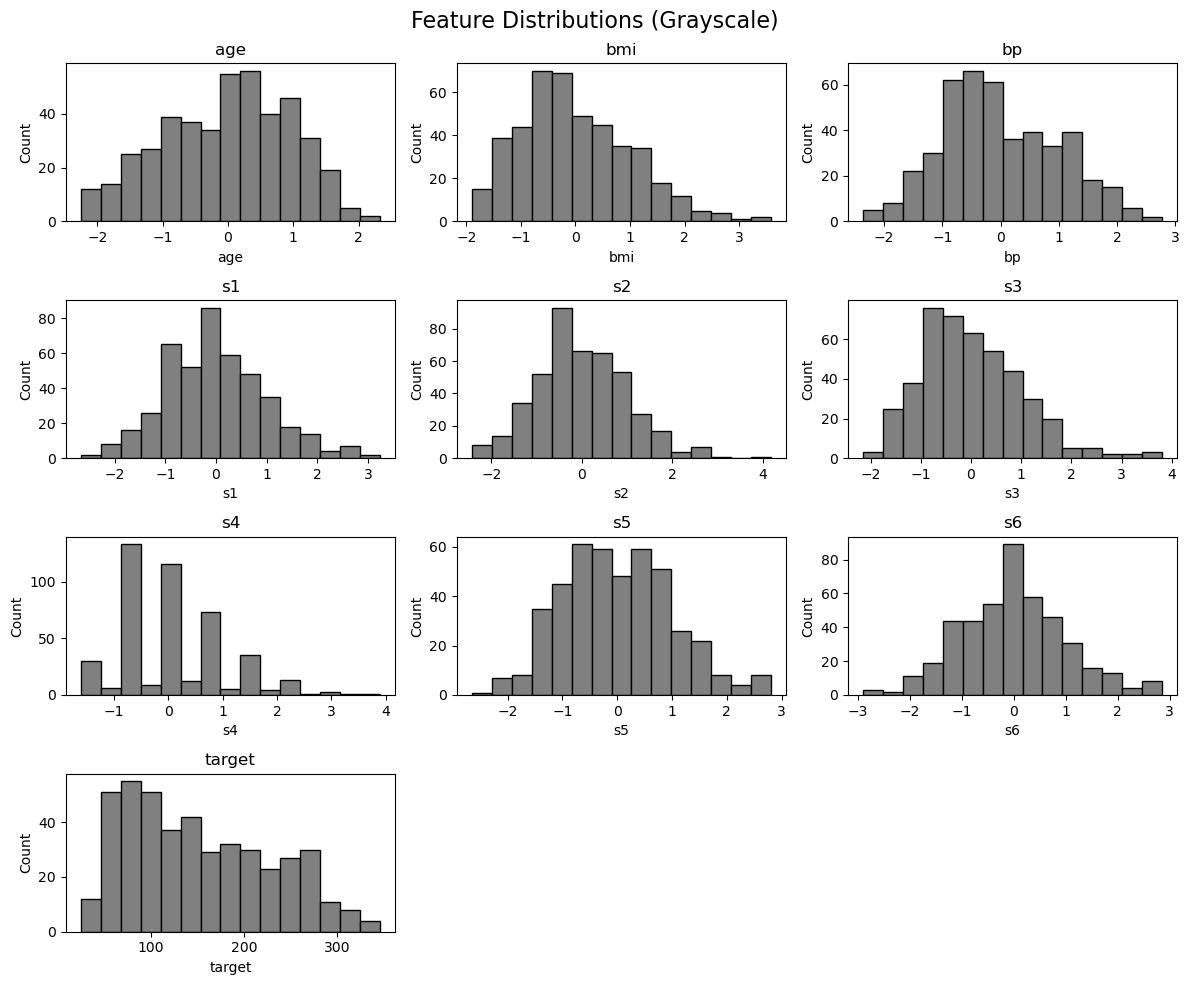

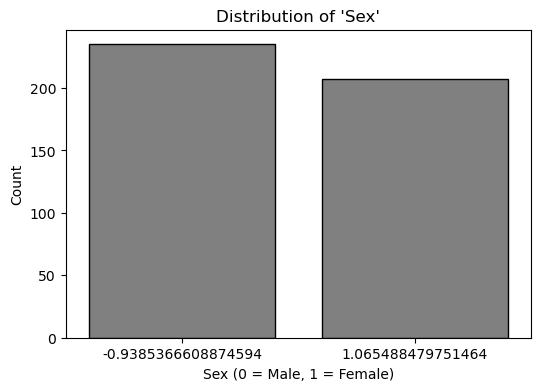

In [9]:
numeric_features = scaled_data.drop(columns=['sex'])
axes = numeric_features.hist(figsize=(12, 10), bins=15, edgecolor='black', color='gray')
plt.suptitle("Feature Distributions (Grayscale)", fontsize=16)

for ax, col in zip(axes.flatten(), numeric_features.columns):
    ax.grid(False)  # Disable grid
    ax.set_xlabel(col)  # Add x-axis label
    ax.set_ylabel("Count")  # Add y-axis label

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=scaled_data, color='gray', edgecolor='black')
plt.title("Distribution of 'Sex'")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.show()

### Step 4: Correlation Heatmap
- Understanding relationships between features and the target variable is crucial for identifying patterns and dependencies in the dataset. A correlation heatmap helps visualize these relationships.

#### Observations

- Features such as bmi, bp, and s5 show strong positive correlations with the target variable.
- Some features (e.g., s1 and s2) are highly correlated with each other, indicating potential multicollinearity.
- s3 has a notable negative correlation with the target variable.

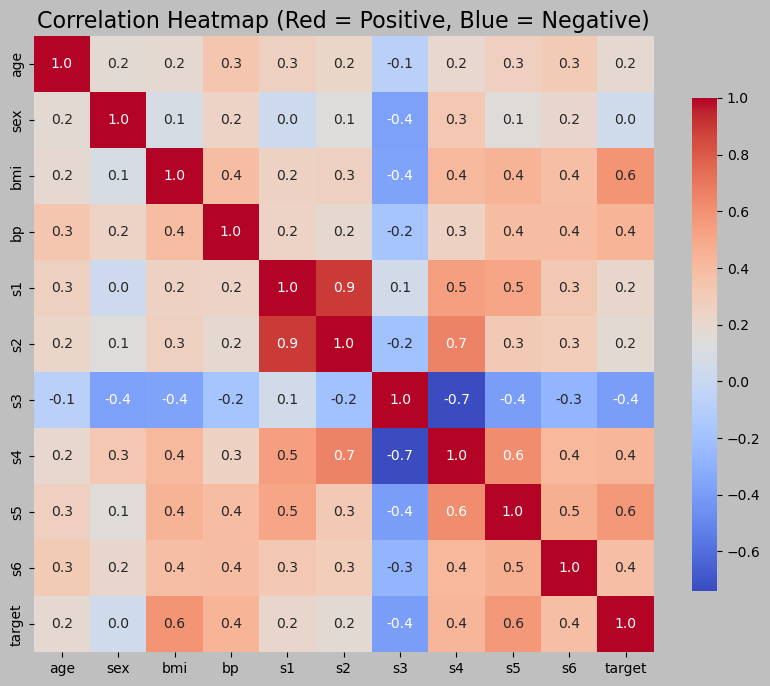

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    scaled_data.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".1f",  # Round to one decimal place
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Red = Positive, Blue = Negative)", fontsize=16)
plt.show()

### Step 5: Pairplot of Selected Features with Target
- To explore relationships between the most correlated features and the target variable, I created a pairplot using scatterplots and kernel density estimates (KDE) on the diagonals.

#### Key Highlights
- Focused on features with the highest correlations with the target variable: bmi, s1, s2, and s3.
- Included the target variable for coloring to visualize its distribution across features.

#### Visualization Details
- Used a coolwarm palette to differentiate target values by intensity (from blue to red).
- Applied KDE for diagonal plots to show the distribution of each feature.

#### Observations
- Positive linear relationships are visible between bmi, s1, and s2 with the target variable.
- A negative relationship is observed between s3 and the target variable, aligning with the insights from the correlation heatmap.

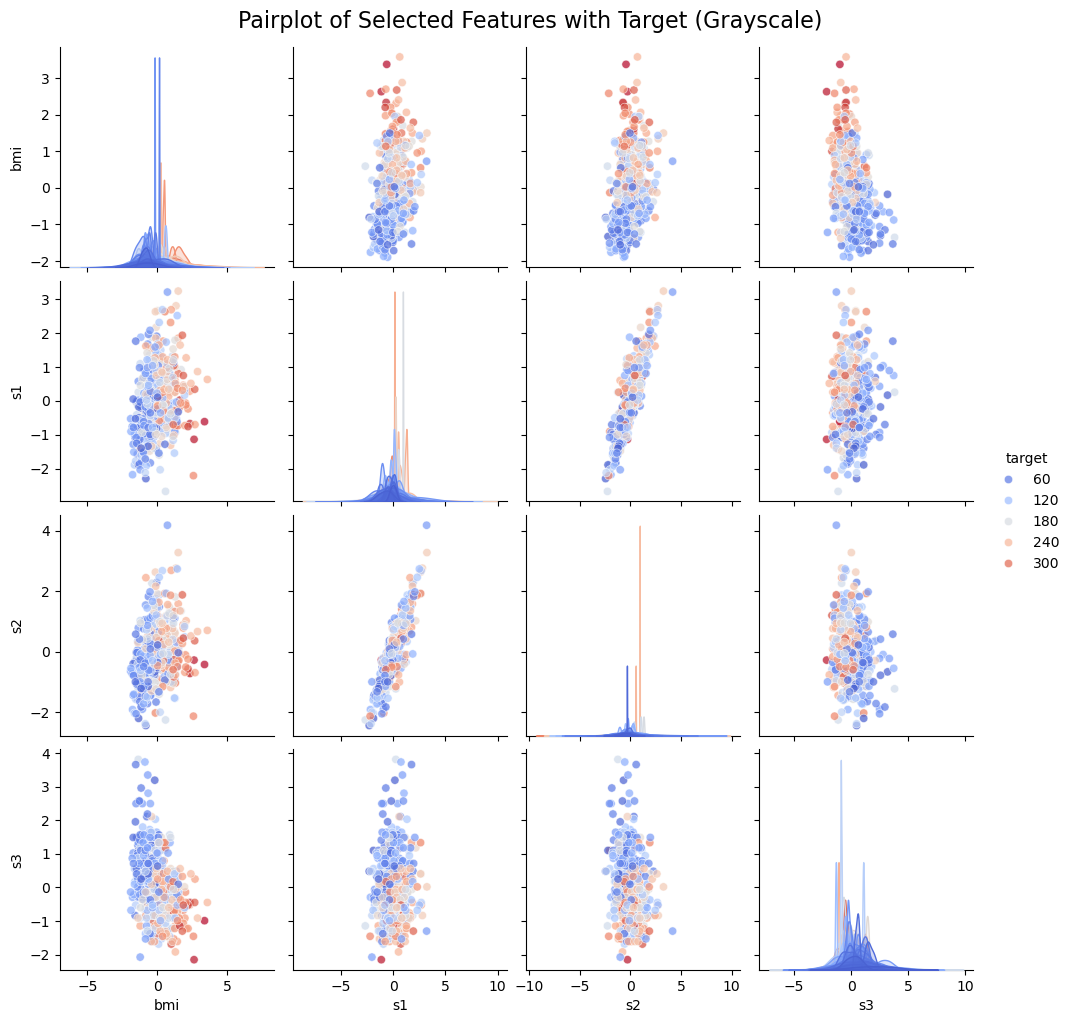

In [12]:
selected_features = ['bmi', 's1', 's2', 's3', 'target'] 

sns.pairplot(
    scaled_data[selected_features],
    hue='target',  
    palette='coolwarm',  
    diag_kind='kde',  
    plot_kws={'alpha': 0.7}
)
plt.suptitle("Pairplot of Selected Features with Target (Grayscale)", y=1.02, fontsize=16)
plt.show()

### Step 6: Boxplots of Features
 - Summarizes the distribution, variability, and presence of outliers for each feature in the dataset.

#### Plot Details
- Features are displayed along the x-axis, and their standardized values are shown along the y-axis.
- Whiskers extend to 1.5 times the interquartile range (IQR) from Q1 and Q3.
- Outliers are values beyond the whiskers, which may require further investigation.
#### Observations
- Most features are centered around 0, consistent with standardization.
- Features like s5 and s1 show a wider range, indicating greater variability.
- Some features (e.g., s1, s2) have a significant number of outliers.

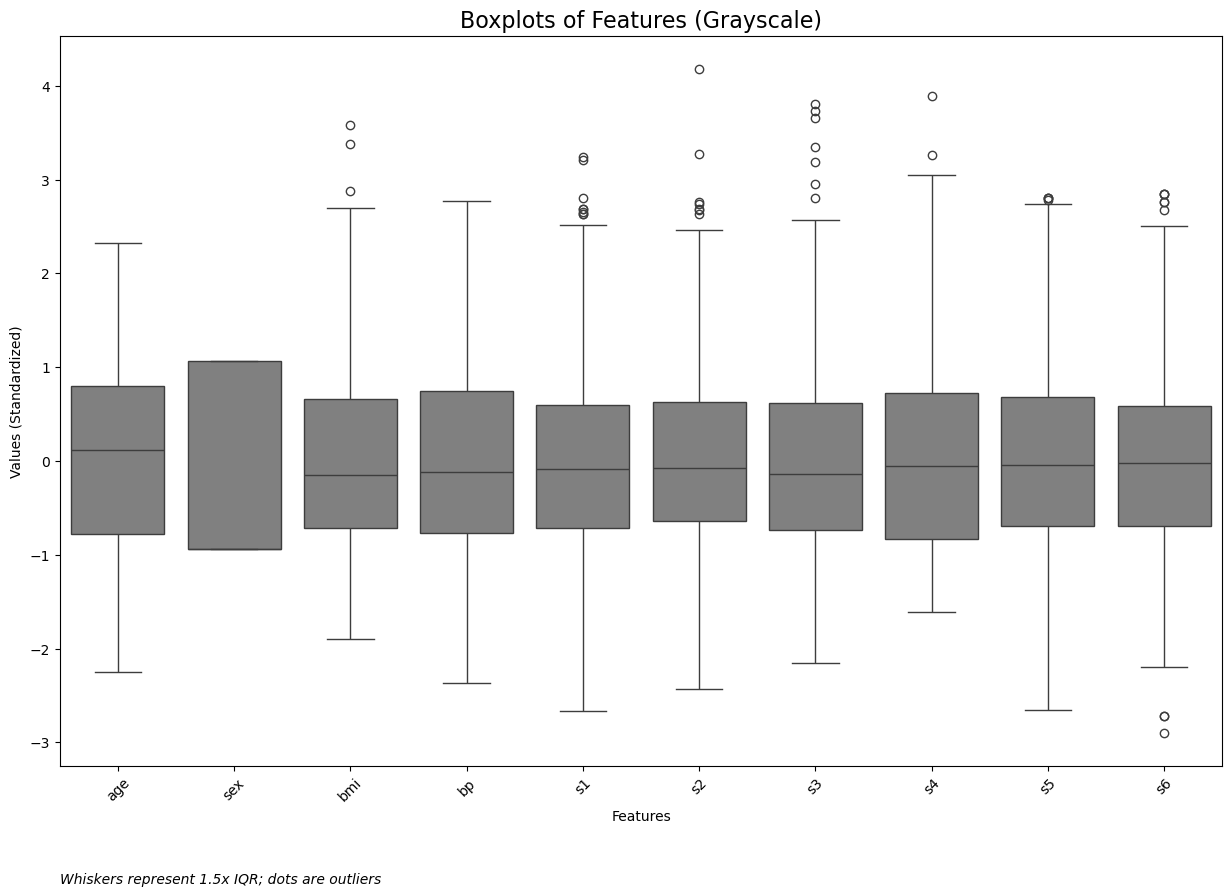

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=scaled_data.iloc[:, :-1], color='gray')  # Exclude the target column
plt.xticks(rotation=45, fontsize=10)
plt.title("Boxplots of Features (Grayscale)", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Values (Standardized)")

# Add explanatory text
plt.text(-0.5, -4.5, "Whiskers represent 1.5x IQR; dots are outliers", fontsize=10, style='italic')

# Adjust spacing to avoid overlap
plt.subplots_adjust(bottom=0.15)  # Increase bottom margin

plt.show()
